In [1]:
using CSV, Images, Plots
using Convex, SCS

In [2]:
function read_image(filename :: String)
    image = CSV.read(filename;header=false)
    Y = convert(Matrix, image)
    return Y
end

read_image (generic function with 1 method)

In [3]:
function lasso(Y :: Matrix, λ=1.0, p=1)
    
    solver = SCSSolver(verbose=false)
    n, m = size(Y)
    Θ = Variable(n, m)
    
    obj = 0.5 * square(norm(vec(Y - Θ)))
    for i in 1:n
        for j in 1:m
            (j < m) ? (vec0 = abs(Θ[i, j] - Θ[i, j+1])) : (vec0 = 0)
            (i < n) ? (vec1 = abs(Θ[i, j] - Θ[i+1, j])) : (vec1 = 0)
            obj = obj + λ * norm(vcat(vec0, vec1), p)
        end
    end
    
    prob = minimize(obj)
    solve!(prob, solver)
    return prob.optval, Θ.value
end

lasso (generic function with 3 methods)

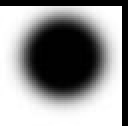

In [4]:
toy = read_image("../toy.csv")
img = Gray.(toy)

┌ Warning: Problem status UnknownError; solution may be inaccurate.
└ @ Convex /home/oxer/.julia/packages/Convex/81M4N/src/solution.jl:48


199.76472256620897


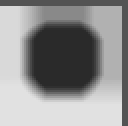

In [5]:
opt1, img1 = lasso(toy, 1, 1)
println(opt1)
Gray.(img1)

182.20549289681057


┌ Warning: Problem status UnknownError; solution may be inaccurate.
└ @ Convex /home/oxer/.julia/packages/Convex/81M4N/src/solution.jl:48


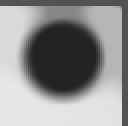

In [6]:
opt2, img2 = lasso(toy, 1, 2)
println(opt2)
Gray.(img2)

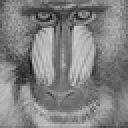

In [7]:
baboon = read_image("../baboon.csv")
img = Gray.(baboon)

In [ ]:
Θ = []
for p in 1:2
    for λ in 0:8
        opt, img = lasso(baboon, 10^(-λ/4), p)
        push!(Θ, (opt, img))
        println("For $p-norm lasso problem with λ=$(10^(-λ/4)), the optimal value is $opt and the solution image is shown above.")
        display(img)
    end
end

64×64 Array{Float64,2}:
 0.499191  0.499192  0.499192  0.499192  …  0.509177  0.509175  0.509174
 0.499192  0.499192  0.499193  0.499193     0.509177  0.509175  0.509173
 0.499192  0.499193  0.499194  0.499194     0.509177  0.509175  0.509173
 0.499193  0.499194  0.499194  0.499195     0.509177  0.509174  0.509172
 0.499193  0.499194  0.499195  0.499196     0.509177  0.509174  0.509172
 0.499194  0.499194  0.499195  0.499196  …  0.509177  0.509174  0.509173
 0.499194  0.499194  0.499195  0.499196     0.509177  0.509175  0.509174
 0.499194  0.499195  0.499195  0.499195     0.509177  0.509175  0.509174
 0.499194  0.499195  0.499195  0.499195     0.509177  0.509176  0.509175
 0.499195  0.499195  0.499196  0.499196     0.509177  0.509176  0.509175
 0.499195  0.499196  0.499196  0.499197  …  0.509177  0.509176  0.509175
 0.499196  0.499197  0.499198  0.499198     0.509178  0.509176  0.509175
 0.499197  0.499198  0.499199  0.499199     0.509178  0.509176  0.509175
 ⋮                         